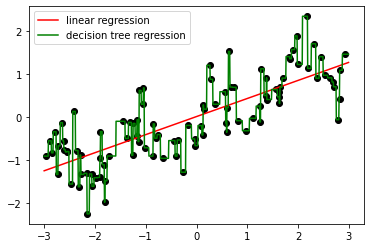

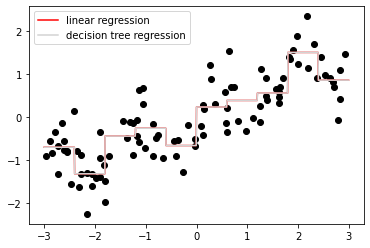

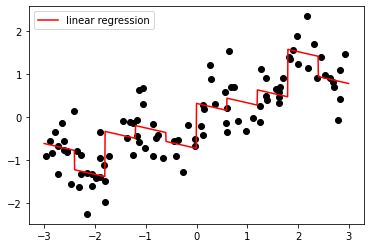

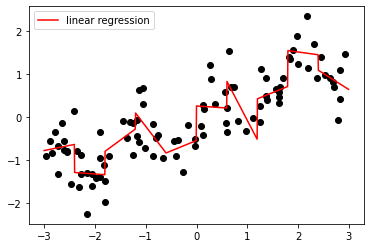

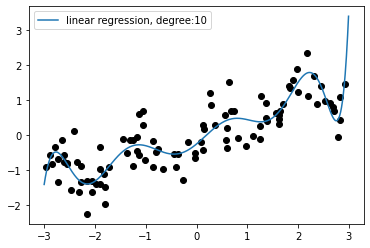

In [9]:
# linear regression:bins,polynomial


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
plt.ion()

n_samples=100
rnd = np.random.RandomState(42)
x = rnd.uniform(-3, 3, size=n_samples)
y_no_noise = (np.sin(4 * x) + x)
y = (y_no_noise + rnd.normal(size=len(x))) / 2
x=x.reshape(-1, 1)
plt.scatter(x,y,color='black')

line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

lr=LinearRegression()
lr.fit(x,y)
plt.plot(line,lr.predict(line),'red',label='linear regression')

dtc=DecisionTreeRegressor(random_state=12)
dtc.fit(x,y)
plt.plot(line,dtc.predict(line),'green',label='decision tree regression')
plt.legend()
plt.figure()

k=np.linspace(-3,3,11)
x_dig=np.digitize(x,bins=k)
line_dig=np.digitize(line,bins=k)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(x_dig)
x_encoded = encoder.transform(x_dig)
line_encoded=encoder.transform(line_dig)

lr=LinearRegression()
lr.fit(x_encoded,y)
plt.plot(line,lr.predict(line_encoded),'red',label='linear regression')

dtc=DecisionTreeRegressor(random_state=22)
dtc.fit(x_encoded,y)
plt.plot(line,dtc.predict(line_encoded),'lightgrey',label='decision tree regression')
plt.scatter(x,y,color='black')
plt.legend()
plt.figure()

x_combined = np.hstack([x, x_encoded])
line_combined=np.hstack([line, line_encoded])
lr=LinearRegression()
lr.fit(x_combined,y)
plt.plot(line,lr.predict(line_combined),'red',label='linear regression')
plt.scatter(x,y,color='black')
plt.legend()
plt.figure()

x_combined = np.hstack([x*x_encoded, x_encoded])
line_combined=np.hstack([line*line_encoded, line_encoded])
lr=LinearRegression()
lr.fit(x_combined,y)
plt.plot(line,lr.predict(line_combined),'red',label='linear regression')
plt.scatter(x,y,color='black')
plt.legend()
plt.figure()

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(x)
x_poly = poly.transform(x)
lr = LinearRegression()
lr.fit(x_poly, y)
line_poly = poly.transform(line)
plt.plot(line, lr.predict(line_poly), label='linear regression, degree:10')
plt.scatter(x,y,color='black')
plt.legend()


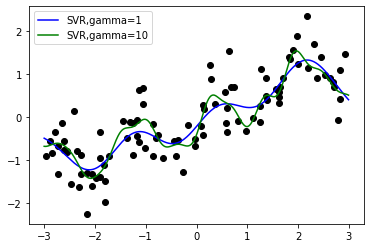

In [10]:
from sklearn.svm import SVR
plt.scatter(x,y,color='black')
svr=SVR(gamma=1)
svr.fit(x,y)
plt.plot(line,svr.predict(line),color='blue',label='SVR,gamma=1')


svr=SVR(gamma=10)
svr.fit(x,y)
plt.plot(line,svr.predict(line),color='green',label='SVR,gamma=10')
plt.legend()

In [28]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

a=load_boston()
X=a.data
y=a.target
X_train, X_test, y_train, y_test = tts(a.data, a.target, random_state=25)

mms= MinMaxScaler()
mms.fit(X_train)
X_train_scaled=mms.transform(X_train)
X_test_scaled=mms.transform(X_test)

pf = PolynomialFeatures(degree=2, include_bias=False)
pf.fit(X_train_scaled)
X_train_poly=pf.transform(X_train_scaled)
X_test_poly=pf.transform(X_test_scaled)

print(pf.get_feature_names())


['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [30]:
from sklearn.linear_model import Ridge
r = Ridge()
r.fit(X_train_scaled, y_train)
print('score without poly',r.score(X_test_scaled, y_test))
r = Ridge()
r.fit(X_train_poly, y_train)
print('score with poly',r.score(X_test_poly,y_test))

score without poly 0.6934307938479334
score with poly 0.8238484149702607
